# Quantum walk search on a hypercube

***Note:*** This implementation is adapted from the quantum walk models available at: https://github.com/hiperwalk/hiperwalk/tree/master/examples/coined

In [23]:
import hiperwalk as hpw
import numpy as np
import matplotlib.pyplot as plt

Consider quantum walk search on a 5-dimensional hypercube.

In [24]:
dimension = 5
g = hpw.Hypercube(dimension)

Simulate the coined quantum walk with $Grover$ coin and mark vertex $0$ as the solution to our search.

In [42]:
qw = hpw.Coined(g, coin='G', marked={'-G': [0]})

Steps to simulate and the initial state.

In [43]:
sim_steps = list(range(151))
init_state = qw.uniform_state()

success_probs = []

for t in sim_steps:
    states = qw.simulate((t, t, 1), initial_state=init_state)
    prob = qw.success_probability(states[0])  
    success_probs.append(prob)

## Probability of measurement at solution vs. time

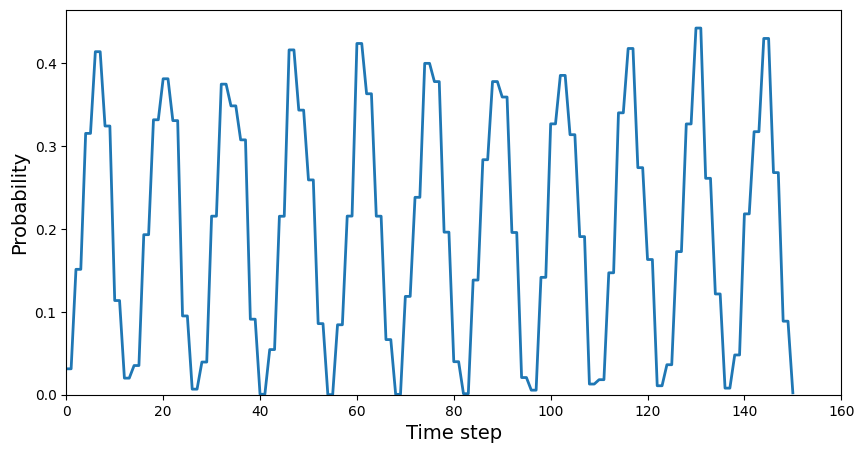

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(sim_steps, success_probs, lw=2)
plt.xlabel("Time step", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.ylim(0, 1.05 * max(success_probs))
plt.xlim(0, 160)
plt.savefig("qw_search_multiple_solutions.png", dpi=300)
plt.show()